# Exploring Covid-19 Data

##### William Ho

In this project I'll take a look at the COVID-19 Dataset on Kaggle, available at this link:
[COVID-19 Dataset](https://www.kaggle.com/datasets/imdevskp/corona-virus-report)

### Import the data

First make sure to install necessary packages:

In [70]:
import sys
!{sys.executable} -m pip install -q statsmodels jupyterlab_widgets ipywidgets bokeh jupyter_bokeh panel plotly adjustText kagglehub statsmodels pandas matplotlib seaborn ipython-sql;


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Then import the required libraries and data set:

In [33]:
import kagglehub

path = kagglehub.dataset_download("imdevskp/corona-virus-report")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\willr\.cache\kagglehub\datasets\imdevskp\corona-virus-report\versions\166


In [34]:
import os

print("Files in dataset directory:")
print(os.listdir(path))

Files in dataset directory:
['country_wise_latest.csv', 'covid_19_clean_complete.csv', 'day_wise.csv', 'full_grouped.csv', 'usa_county_wise.csv', 'worldometer_data.csv']


In [35]:
import pandas as pd

csv_path = os.path.join(path, "covid_19_clean_complete.csv")
df = pd.read_csv(csv_path)
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Now we have an idea of what the data looks like, lets also look at all the countries included

In [36]:
df['Country/Region'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Benin', 'Bhutan', 'Bolivia',
       'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada',
       'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Congo (Brazzaville)', 'Congo (Kinshasa)', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark',
       'Greenland', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon',
       'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala',
       'Guinea', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary',
       'Iceland', 'India', 'Ind

### Clean and explore the data

Since this table does not contain information for `Province/State` I'll remove the column\
I'll also rename the "Country/Region" column to just "Country" for ease of use
I'll also rename "Who Region" to "Who_Region" to avoid mistakes

In [37]:
df = df.drop(columns=["Province/State"])
df.rename(columns={'Country/Region': 'Country'}, inplace=True)
df.rename(columns={'WHO Region': 'WHO_Region'}, inplace=True)
df.head()

,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO_Region
0,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


Now lets explore the other columns and look for missing values

In [38]:
# Take a look at the column types as well as null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Country     49068 non-null  object 
 1   Lat         49068 non-null  float64
 2   Long        49068 non-null  float64
 3   Date        49068 non-null  object 
 4   Confirmed   49068 non-null  int64  
 5   Deaths      49068 non-null  int64  
 6   Recovered   49068 non-null  int64  
 7   Active      49068 non-null  int64  
 8   WHO_Region  49068 non-null  object 
dtypes: float64(2), int64(4), object(3)
memory usage: 3.4+ MB


* There are no null objects in any of the remaining columns
* `Confirmed`, `Deaths`,  `Recovered`, and `Active` are all integers, which are good for mathematical analysis
* However, `Country/Region`, `Date`, and `Who_Region` are all saved as objects, so I'll change them to more valuable types for data analysis

In [39]:
df['Date'] = pd.to_datetime(df['Date']) # Makes date into date format
df['Country'] = df['Country'].astype('category') # Makes Country into a category since we have multiple instances of each
df['WHO_Region'] = df['WHO_Region'].astype('category') # Makes Region a category since we have multiple instances of each

Next I'll use the `describe()` method to get a better idea of what the data looks like\
This should be particularly helpful in inspiring potential questions to answer using data analysis

In [40]:
df.describe()

,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
count,49068.000000,49068.000000,49068,4.906800e+04,49068.000000,4.906800e+04,4.906800e+04
mean,21.433730,23.528236,2020-04-24 12:00:00,1.688490e+04,884.179160,7.915713e+03,8.085012e+03
min,-51.796300,-135.000000,2020-01-22 00:00:00,0.000000e+00,0.000000,0.000000e+00,-1.400000e+01
25%,7.873054,-15.310100,2020-03-08 18:00:00,4.000000e+00,0.000000,0.000000e+00,0.000000e+00
50%,23.634500,21.745300,2020-04-24 12:00:00,1.680000e+02,2.000000,2.900000e+01,2.600000e+01
75%,41.204380,80.771797,2020-06-10 06:00:00,1.518250e+03,30.000000,6.660000e+02,6.060000e+02
max,71.706900,178.065000,2020-07-27 00:00:00,4.290259e+06,148011.000000,1.846641e+06,2.816444e+06
std,24.950320,70.442740,NaN,1.273002e+05,6313.584411,5.480092e+04,7.625890e+04


* It looks like our data starts on January 22, 2020 going up until July 27, 2020
* Some countries have 0 recorded confirmed, deaths, and recovered which may be useful to remove/ignore
* On the other hand, countries had up to 148,011 deaths with 2,816,444 active cases

SQL will be particularly helpful for me to run queries on this data set\
I'll use `sqlite3` to run SQL queries in Python

In [41]:
import sqlite3, prettytable

# Include prettytable to display results
prettytable.DEFAULT = 'DEFAULT'

# Allow sql cell magic
%load_ext sql

# Make the database 'covid.db' with the table 'covid' and connect to it
conn = sqlite3.connect("covid.db")
df.to_sql('covid', conn, if_exists='replace', index=False)

# Use the database 'covid.db'
%sql sqlite:///covid.db

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


Start by checking everything still works by running a simple query

In [42]:
%%sql
select *
from covid
limit 5;

 * sqlite:///covid.db
Done.


Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO_Region
Afghanistan,33.93911,67.709953,2020-01-22 00:00:00,0,0,0,0,Eastern Mediterranean
Albania,41.1533,20.1683,2020-01-22 00:00:00,0,0,0,0,Europe
Algeria,28.0339,1.6596,2020-01-22 00:00:00,0,0,0,0,Africa
Andorra,42.5063,1.5218,2020-01-22 00:00:00,0,0,0,0,Europe
Angola,-11.2027,17.8739,2020-01-22 00:00:00,0,0,0,0,Africa


`df.describe()` already gave us a pretty good understanding of this data set\
However, I'd like to take a look at which Countries and Regions had particularly high case numbers\
I'd also like to check out which countries have no records in this table and may need to be removed

In [43]:
%%sql
select
    Country,
    sum(Confirmed) as total_confirmed,
    sum(Deaths) as total_deaths,
    sum(Recovered) as total_recovered,
    sum(Active) as total_active
from covid
where -- this ensures we only take the final cumulative data for each country so no country repeats
    date = '2020-07-27 00:00:00'
group by -- necessary to resolve all the instances where the Country is the same on the same day
    Country
order by
    total_confirmed desc,
    total_deaths desc
limit 5;

 * sqlite:///covid.db
Done.


Country,total_confirmed,total_deaths,total_recovered,total_active
US,4290259,148011,1325804,2816444
Brazil,2442375,87618,1846641,508116
India,1480073,33408,951166,495499
Russia,816680,13334,602249,201097
South Africa,452529,7067,274925,170537


In [44]:
%%sql
select
    Country,
    sum(Confirmed) as total_confirmed,
    sum(Deaths) as total_deaths,
    sum(Recovered) as total_recovered,
    sum(Active) as total_active
from covid
where -- this ensures we only take the final cumulative data for each country so no country repeats
    date = '2020-07-27 00:00:00'
group by -- just in case some countries have multiple entries on the same day
    Country
order by
    total_recovered desc,
    total_active desc
limit 5;

 * sqlite:///covid.db
Done.


Country,total_confirmed,total_deaths,total_recovered,total_active
Brazil,2442375,87618,1846641,508116
US,4290259,148011,1325804,2816444
India,1480073,33408,951166,495499
Russia,816680,13334,602249,201097
Chile,347923,9187,319954,18782


In [45]:
%%sql
select
    Country,
    (cast(sum(Recovered) as float) / sum(Confirmed)) as Recovery_Ratio
from covid
where -- this ensures we only take the final cumulative data for each country so no country repeats
    date = '2020-07-27 00:00:00'
group by
    Country
order by
    Recovery_Ratio desc
limit 5;

 * sqlite:///covid.db
Done.


Country,Recovery_Ratio
Holy See,1.0
Grenada,1.0
Dominica,1.0
Djibouti,0.9837912630954734
Iceland,0.9832793959007551


In [46]:
%%sql
select
    WHO_Region,
    sum(Confirmed) as total_confirmed,
    sum(Deaths) as total_deaths,
    sum(Recovered) as total_recovered,
    sum(Active) as total_active
from covid
where
    date = '2020-07-27 00:00:00'
group by
    WHO_Region
order by
    total_confirmed desc,
    total_deaths desc;

 * sqlite:///covid.db
Done.


WHO_Region,total_confirmed,total_deaths,total_recovered,total_active
Americas,8839286,342732,4468616,4027938
Europe,3299523,211144,1993723,1094656
South-East Asia,1835297,41349,1156933,637015
Eastern Mediterranean,1490744,38339,1201400,251005
Africa,723207,12223,440645,270339
Western Pacific,292428,8249,206770,77409


In [47]:
%%sql
select
    Country,
    sum(confirmed) as total_confirmed
from covid
where
    date = '2020-07-27 00:00:00'
group by
    Country
having total_confirmed < 100
conn.close()

 * sqlite:///covid.db
(sqlite3.OperationalError) near "conn": syntax error
[SQL: select
    Country,
    sum(confirmed) as total_confirmed
from covid
where
    date = '2020-07-27 00:00:00'
group by
    Country
having total_confirmed < 100
conn.close()]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


Based on this data, the US, Brazil, Russia, and India all seem to have highest case and death counts\
The Americas and Europe seem to have been hit the hardest\
Countries have as few as 10 total cases, but none have 0 all the way through the data set\
However, this data set has many possible confounding factors:
* Some countries may have reason to misreport data to make their numbers look better
* Poorer countries may not have good enough technology to track covid cases accurately
* Some countries may have not interest in keeping data on such matters\
However, many of these factors are out of my control now that the data has been collected, so let's\
move forward with this analysis!

Great, everything looks good to go so I'll work on answering a few interseting questions

### Question 1: How do countries compare in terms of total cases?

In [48]:
# I'll import matplotlib and seaborn here to aid in my analysis by providing an 
# easy way to generate visualizations
import matplotlib.pyplot as plt
import seaborn as sns

##### First I'll look at the 20 countries with the most cases:

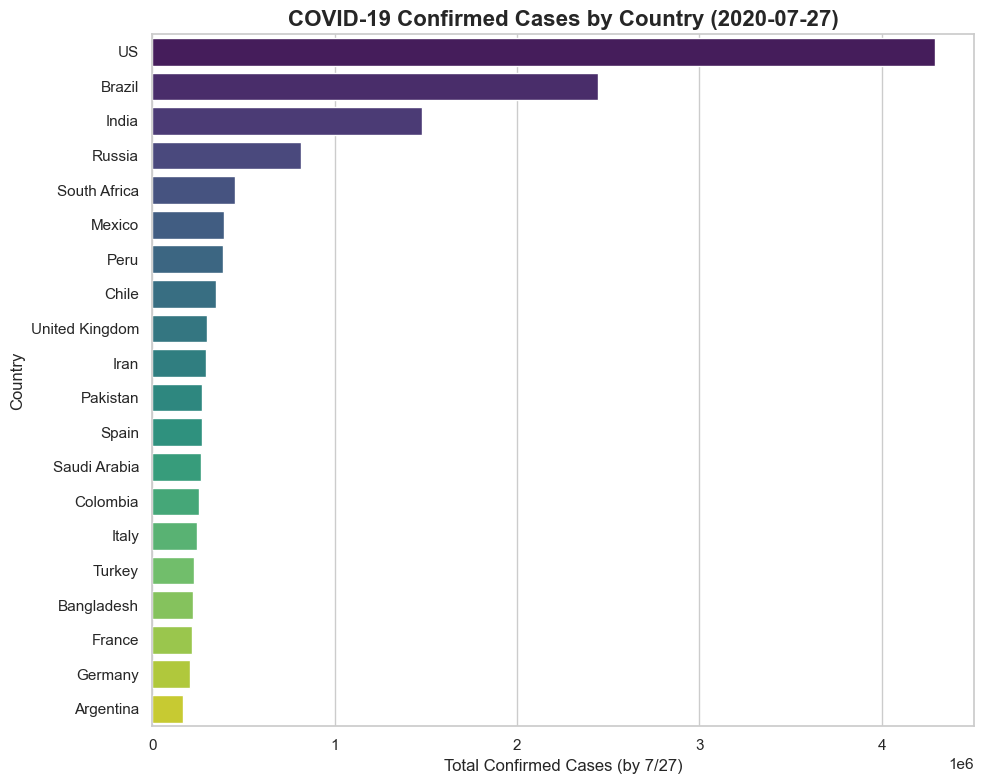

In [49]:
#First convert a SQL query into a pd data frame
conn = sqlite3.connect("covid.db")
query = """
select
    Country,
    sum(Confirmed) as total_confirmed
from covid
where
    date = '2020-07-27 00:00:00'
group by
    Country
order by
    total_confirmed desc
limit 20;
"""
df = pd.read_sql(query, conn)

# now graph the data
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(
    data=df,
    y="Country",               
    x="total_confirmed",
    hue="Country",
    dodge=False,
    legend=False,
    palette="viridis"
)

plt.xlabel("Total Confirmed Cases (by 7/27)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("COVID-19 Confirmed Cases by Country (2020-07-27)", fontsize=16, weight="bold")

plt.tight_layout()
plt.show()

It seems like the USs tracked many more confirmed cases than any other country, with a sharp dropoff\
between US, Brazil, India, Russia, and the rest of the countries

##### Now for the 20 countries with the fewest cases:

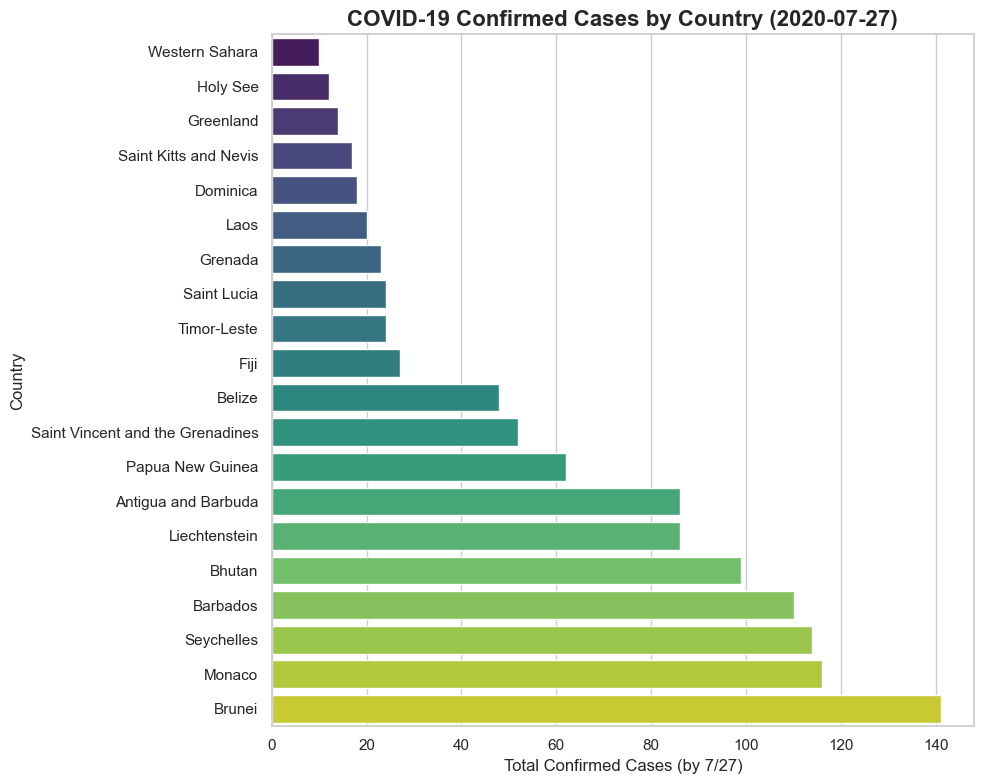

In [50]:
#First convert a SQL query into a pd data frame
query = """
select
    Country,
    sum(Confirmed) as total_confirmed
from covid
where
    date = '2020-07-27 00:00:00'
group by
    Country
order by
    total_confirmed asc
limit 20;
"""
df = pd.read_sql(query, conn)
conn.close()

# Now graph the data
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 8))
sns.barplot(
    data=df,
    y="Country",               
    x="total_confirmed",
    hue="Country",
    dodge=False,
    legend=False,
    palette="viridis"
)

plt.xlabel("Total Confirmed Cases (by 7/27)", fontsize=12)
plt.ylabel("Country", fontsize=12)
plt.title("COVID-19 Confirmed Cases by Country (2020-07-27)", fontsize=16, weight="bold")

plt.tight_layout()
plt.show()

It is interesting to see which countries have the fewest reported cases. For me, it is not surprising\
that isolated countries like Greenland or Fiji have such low numbers.\
Similarly, I am not surprised to see a small place like Holy See having a very small number of cases\
since their population is not very large to start with.

### Question 2: How did covid case data change over time?

Let's first take a look at the data for the top 10 countries over time then at the global data

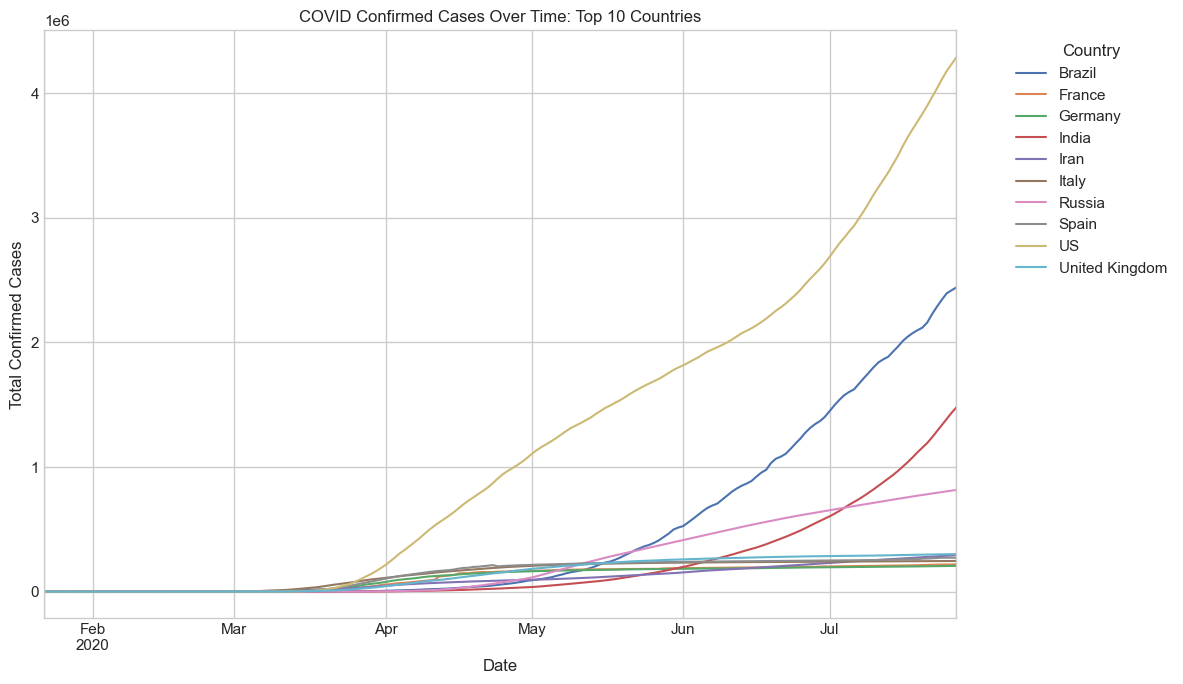

In [51]:
conn = sqlite3.connect("covid.db")
import pandas as pd
import matplotlib.pyplot as plt

top_query = """
with top_10 as (
  select
    Country,
    sum(Confirmed) as total_confirmed
  from covid
  group by Country
  order by total_confirmed desc
  limit 10
)
select
  c.Country,
  c.Date,
  sum(c.Confirmed) as total_confirmed
from covid as c
join top_10 as t
  on c.Country = t.Country
group by c.Country, c.Date
order by c.Date, c.Country;
"""
df = pd.read_sql_query(top_query, conn, parse_dates=["Date"])
pivot = df.pivot(index="Date", columns="Country", values="total_confirmed").sort_index()

plt.style.use("seaborn-v0_8-whitegrid") 
plt.figure(figsize=(12, 7))
pivot.plot(ax=plt.gca(), legend=False)
plt.title("COVID Confirmed Cases Over Time: Top 10 Countries")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

It is clear that around April the US cases shot up much quicker than other countries\
However, around June, both Brazil and India's case counts skyrocketed

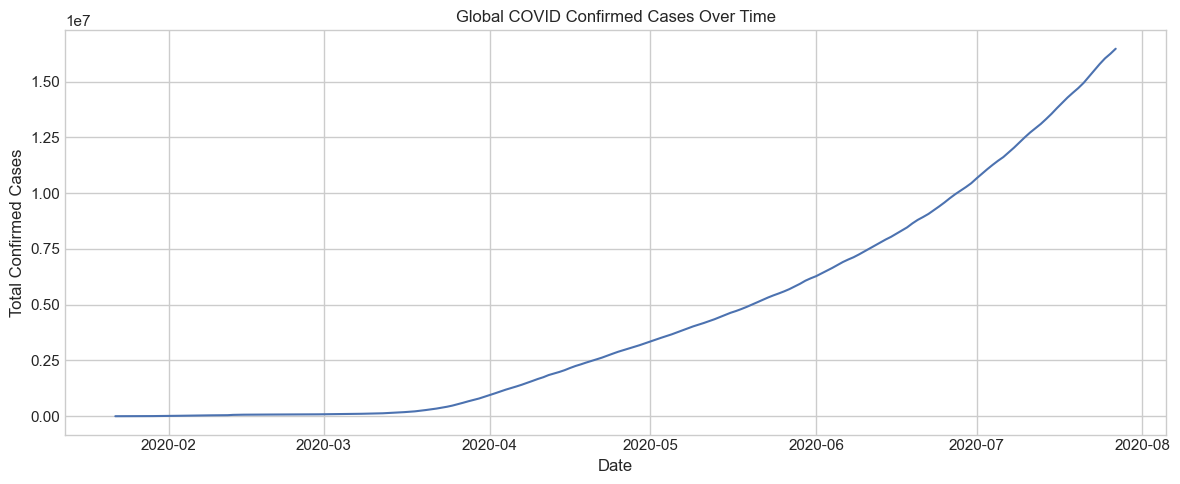

In [52]:
global_query = """
select
  Date,
  sum(Confirmed) as total_confirmed
from covid
group by Date
order by Date;
"""
gdf = pd.read_sql_query(global_query, conn, parse_dates=["Date"]).sort_values("Date")

plt.figure(figsize=(12, 5))
plt.plot(gdf["Date"], gdf["total_confirmed"])
plt.title("Global COVID Confirmed Cases Over Time")
plt.xlabel("Date")
plt.ylabel("Total Confirmed Cases")
plt.tight_layout()
plt.show()


The trends of the top 10 countires seem to explain the global data quite well\
Around April there is an increase in slope, followed by another increase around June or July\
Let's do a quick sanity test to make sure this is true

In [53]:
import statsmodels.api as sm

# first make the dataframes and merge
top_df = pd.read_sql_query(top_query, conn, parse_dates=["Date"])
global_df = pd.read_sql_query(global_query, conn, parse_dates=["Date"])
df_reg = pd.merge(global_df, top_df, on="Date", suffixes=("_global", "_top10"))

# perform a regression
X = sm.add_constant(df_reg["total_confirmed_top10"])
y = df_reg["total_confirmed_global"]
model = sm.OLS(y, X).fit()

print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     total_confirmed_global   R-squared:                       0.280
Model:                                OLS   Adj. R-squared:                  0.279
Method:                     Least Squares   F-statistic:                     729.1
Date:                    Sun, 10 Aug 2025   Prob (F-statistic):          5.84e-136
Time:                            19:20:28   Log-Likelihood:                -31260.
No. Observations:                    1880   AIC:                         6.252e+04
Df Residuals:                        1878   BIC:                         6.253e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

##### Results:
* With a coefficient of 4.3678, for every one top 10 case, global cases go up by about 4.3678
* Thus although they account for a portion of cases, the other countries still account for more
* R-squared of .28 means only about 28% of the global variance is explained by the top 10 countries
* Thus, although the top 10 countries do account for much of the data (particularly considering there\
are so many other countries) they are not the majority of cases\
Finally I'll took a look at all global cases, recovered, deaths, and active

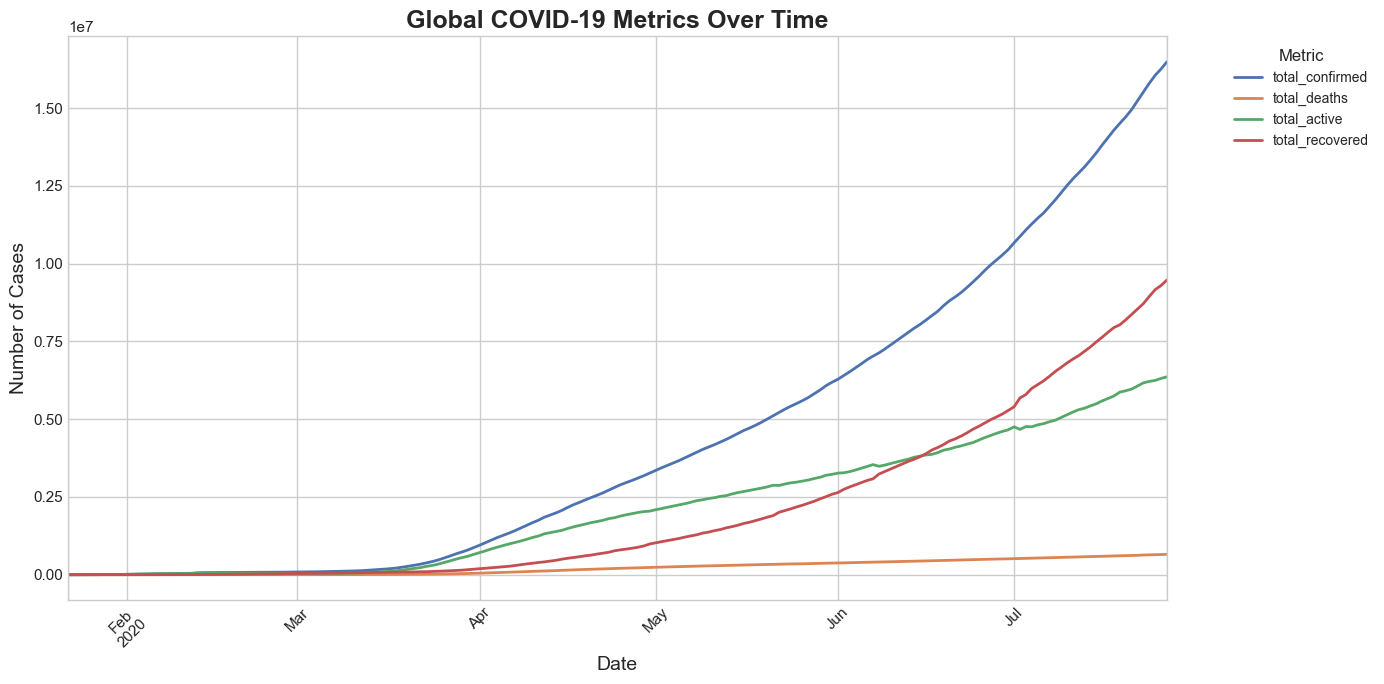

In [54]:
global_query = """
select
  Date,
  sum(Confirmed) as total_confirmed,
  sum(Active) as total_active,
  sum(Deaths) as total_deaths,
  sum(Recovered) as total_recovered
from covid
group by Date
order by Date;
"""
global_df = pd.read_sql_query(global_query, conn, parse_dates=["Date"]).sort_values("Date")
global_df = global_df.set_index("Date")
plt.figure(figsize=(14, 7))
global_df[["total_confirmed", "total_deaths", "total_active", "total_recovered"]].plot(ax=plt.gca(), linewidth=2)
plt.title("Global COVID-19 Metrics Over Time", fontsize=18, weight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()
plt.show()

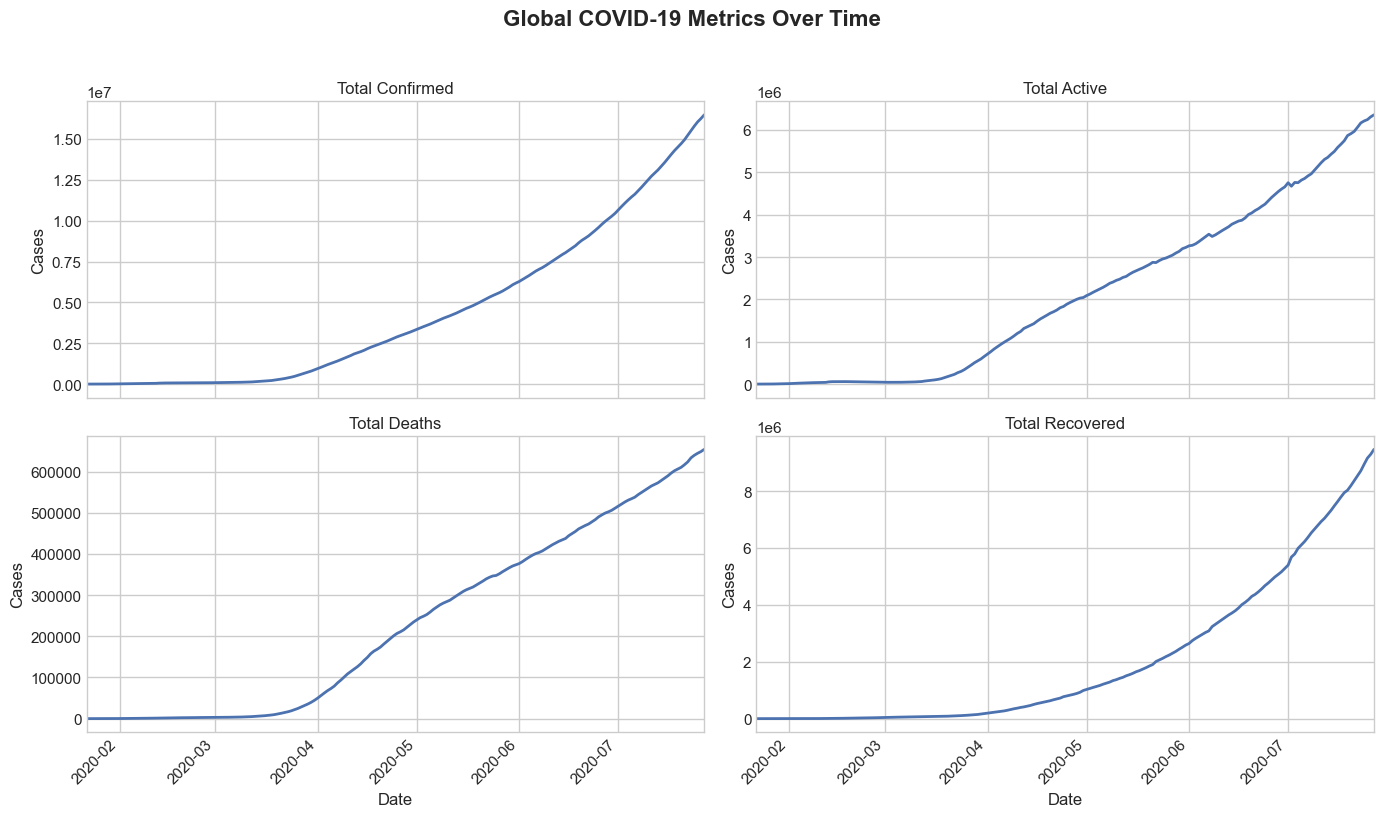

In [55]:
# we can also look at this using subplots for easier comparison
global_df = pd.read_sql_query(global_query, conn, parse_dates=["Date"]).sort_values("Date")
global_df = global_df.set_index("Date")
conn.close()

metrics = [
    ("total_confirmed", "Total Confirmed"),
    ("total_active", "Total Active"),
    ("total_deaths", "Total Deaths"),
    ("total_recovered", "Total Recovered"),
]

fig, axes = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
axes = axes.ravel()

import matplotlib.dates as mdates
for ax, (col, title) in zip(axes, metrics):
    global_df[col].plot(ax=ax, legend=False, linewidth=2)
    ax.set_title(title)
    ax.set_ylabel("Cases")
    # Monthly ticks and YYYY-MM labels
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))
    for label in ax.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

# Overall title and layout
fig.suptitle("Global COVID-19 Metrics Over Time", fontsize=16, fontweight="bold", y=1.02)
plt.tight_layout()
plt.show()

### Question 3: What does the monthly data look like?

First lets look at regional data and then we can check what individual countries look like

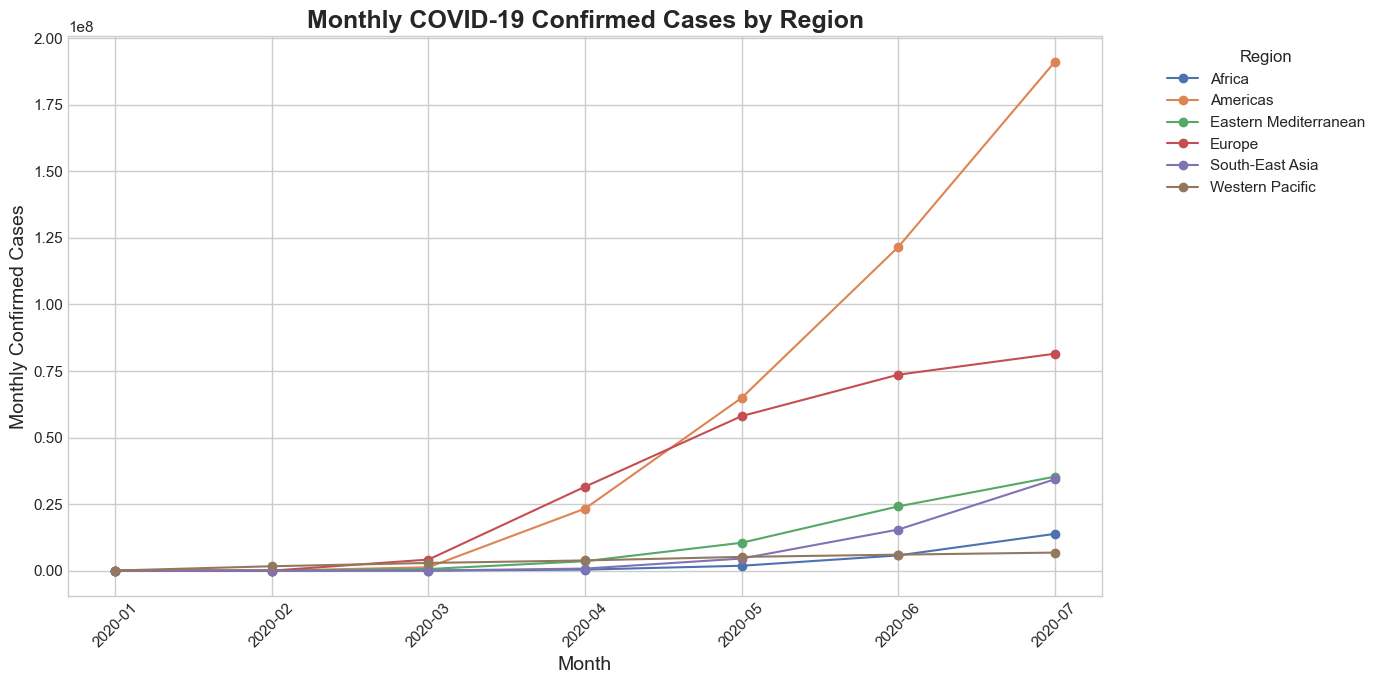

In [56]:
# looking at confirmed cases first
conn = sqlite3.connect("covid.db")
monthly_df = pd.read_sql_query("""
select
    Country,
    WHO_Region,
    strftime('%Y-%m', Date) as year_month,
    sum(Confirmed) as monthly_confirmed
from covid
group by Country, WHO_Region, year_month
order by year_month, Country;
""", conn)

region_month = (
    monthly_df.groupby(["WHO_Region", "year_month"])["monthly_confirmed"]
    .sum()
    .reset_index()
)

pivot_rm = region_month.pivot(index="year_month", columns="WHO_Region", values="monthly_confirmed")

plt.figure(figsize=(14, 7))
pivot_rm.plot(ax=plt.gca(), marker='o')
plt.title("Monthly COVID-19 Confirmed Cases by Region", fontsize=18, weight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Monthly Confirmed Cases", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

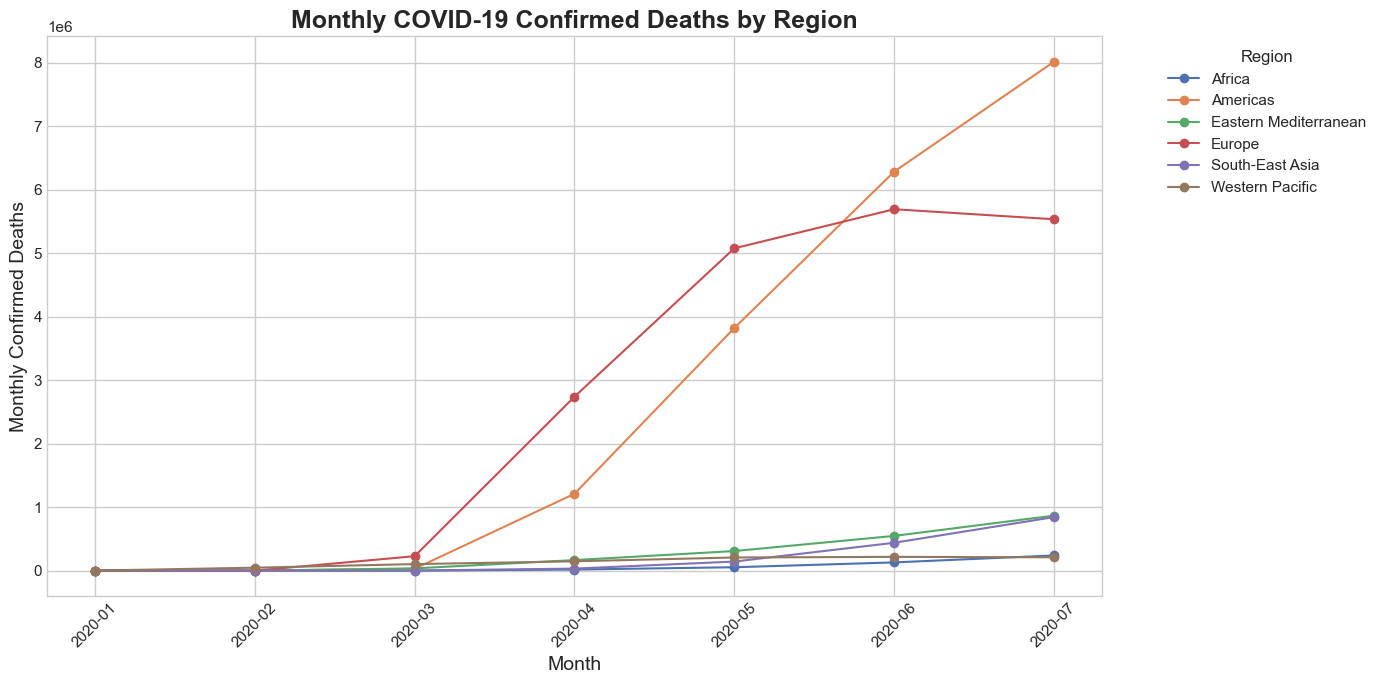

In [57]:
# now take a look at deaths from Covid
monthly_df = pd.read_sql_query("""
select
    Country,
    WHO_Region,
    strftime('%Y-%m', Date) as year_month,
    sum(Deaths) as monthly_deaths
from covid
group by Country, WHO_Region, year_month
order by year_month, Country;
""", conn)

region_month = (
    monthly_df.groupby(["WHO_Region", "year_month"])["monthly_deaths"]
    .sum()
    .reset_index()
)

pivot_region = region_month.pivot(index="year_month", columns="WHO_Region", values="monthly_deaths")
plt.figure(figsize=(14, 7))
pivot_region.plot(ax=plt.gca(), marker='o')
plt.title("Monthly COVID-19 Confirmed Deaths by Region", fontsize=18, weight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Monthly Confirmed Deaths", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Region", bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

It is interesting to see that although cases and deaths line up, the graph shape is slightly different

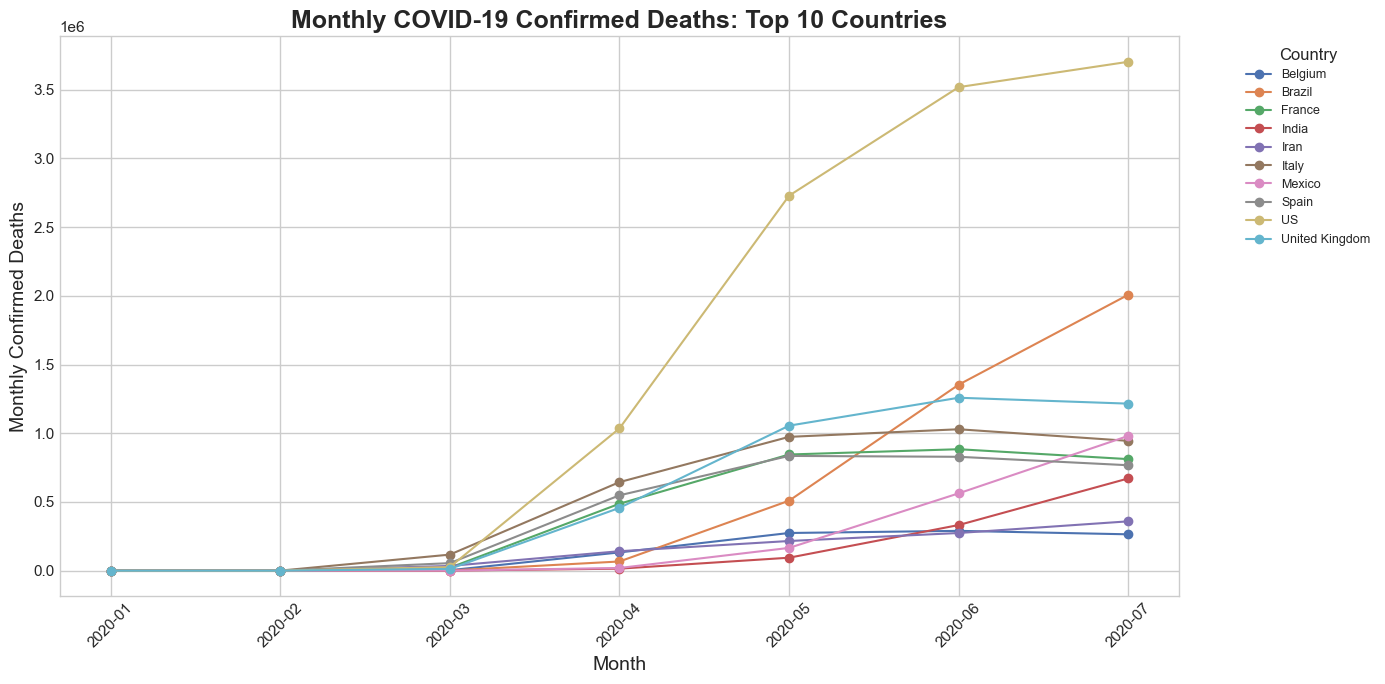

In [58]:
top10_monthly = pd.read_sql_query("""
with top_10 as (
    select Country
    from covid
    group by Country
    order by sum(Deaths) desc
    LIMIT 10
)
select
    c.Country,
    strftime('%Y-%m', c.Date) as year_month,
    sum(c.Deaths) as monthly_deaths
from covid as c
join top_10 as t
  on c.Country = t.Country
group by c.Country, year_month
order by year_month, c.Country;
""", conn)

pivot_top10 = top10_monthly.pivot(index="year_month", columns="Country", values="monthly_deaths")
plt.figure(figsize=(14, 7))
pivot_top10.plot(ax=plt.gca(), marker='o')
plt.title("Monthly COVID-19 Confirmed Deaths: Top 10 Countries", fontsize=18, weight='bold')
plt.xlabel("Month", fontsize=14)
plt.ylabel("Monthly Confirmed Deaths", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), fontsize=9)
plt.tight_layout()
plt.show()

This should look a bit like the chart from earlier depicting cases, but just like with global data,\
there are some differences in shape\
Now let's look at how much correlation there actually is between confirmed cases and deaths

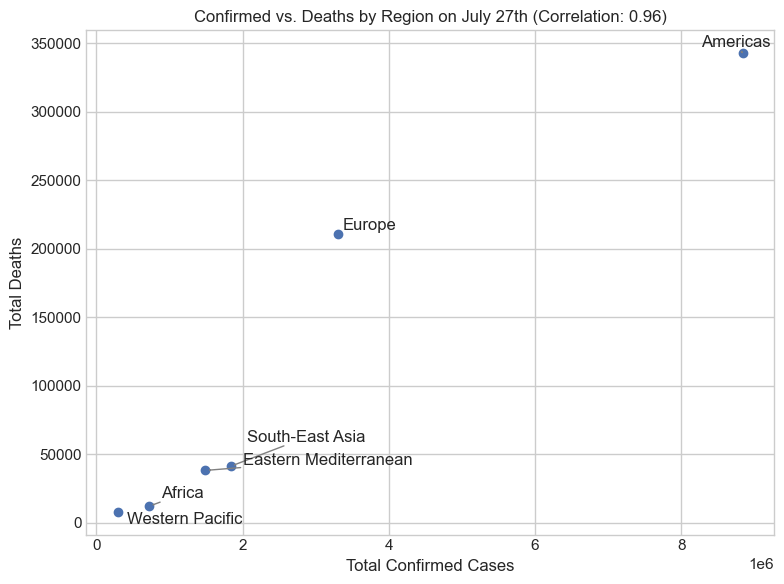

In [59]:
full_query = """
select
    WHO_Region,
    sum(Confirmed) as total_confirmed,
    sum(Deaths) as total_deaths
from covid
where Date = '2020-07-27 00:00:00'
group by WHO_Region
order by total_confirmed desc;
"""

region_totals = pd.read_sql_query(full_query, conn)

# let's look at correlation here
corr = region_totals["total_confirmed"].corr(region_totals["total_deaths"])

from adjustText import adjust_text # use this to make sure region names don't overlap
plt.figure(figsize=(8, 6))
plt.scatter(region_totals["total_confirmed"], region_totals["total_deaths"])

texts = []
for i, row in region_totals.iterrows():
    texts.append(
        plt.text(row["total_confirmed"], row["total_deaths"], row["WHO_Region"])
    )

plt.xlabel("Total Confirmed Cases")
plt.ylabel("Total Deaths")
plt.title(f"Confirmed vs. Deaths by Region on July 27th (Correlation: {corr:.2f})")

adjust_text(texts, arrowprops=dict(arrowstyle="->", color='gray'))
plt.tight_layout()
plt.show()

This sanity check makes sense because although confirmed cases should predict deaths quite well\
since the disease will have an approximate fatality rate, other factors like available healthcare,\
available technology, genetics, and local environment may all play factors in this relationship.

Let's break this down even further and look at each country from each region as a datapoint.\
The following facetgrid will demonstrate the correlation between confirmed cases and deaths for\
each region, with individual countries as data points.

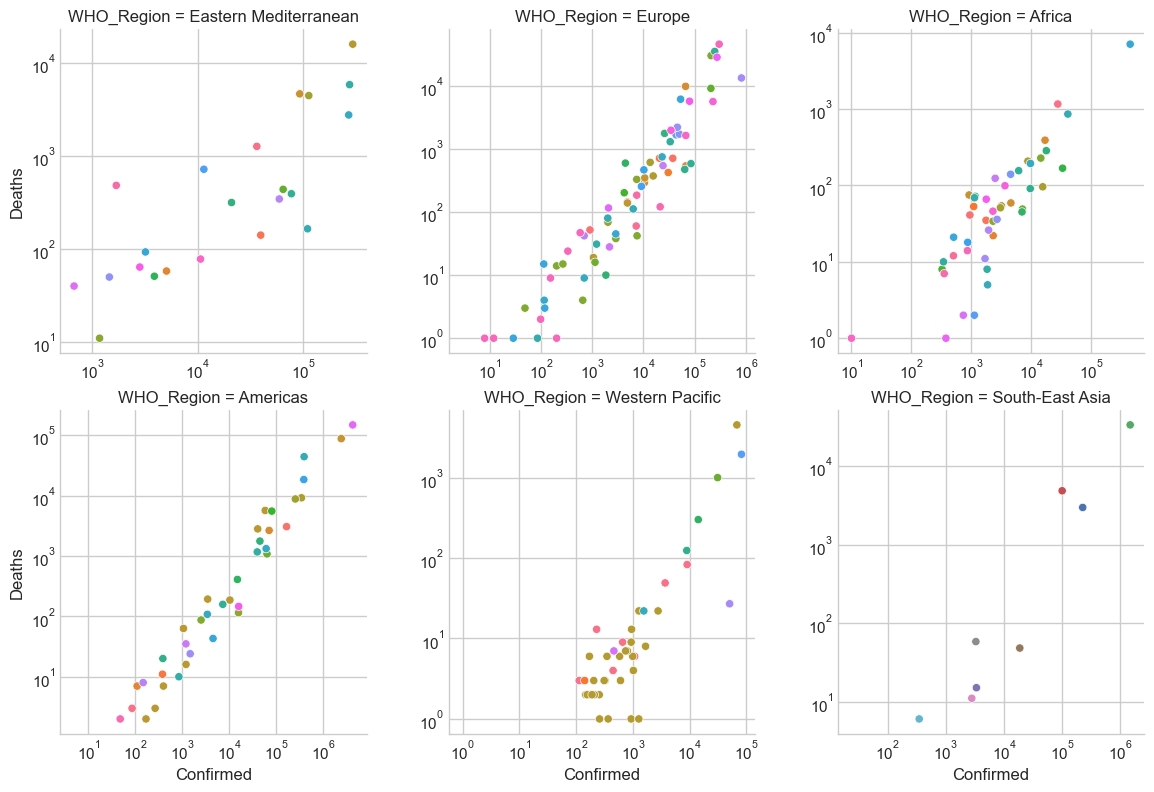

In [60]:
full_query = """
SELECT *
FROM covid
WHERE Date = '2020-07-27 00:00:00'
"""
final_df = pd.read_sql_query(full_query, conn, parse_dates=["Date"])
conn.close()
g = sns.FacetGrid(final_df, col="WHO_Region", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.scatterplot, x="Confirmed", y="Deaths", hue="Country")
g.set(xscale="log", yscale="log")

### Question 4: What does the data look like for the US, China, and Japan specifically?

I'll be taking a look at these three countries of interest to me. I'll take a look at the data for\
confirmed, active, deaths, and recovered and plot these over time

Below is a dropdown to view the data for each of the three aforementioned countries

Dropdown(description='Country:', options=('US', 'Japan', 'China'), value='US')

Output()

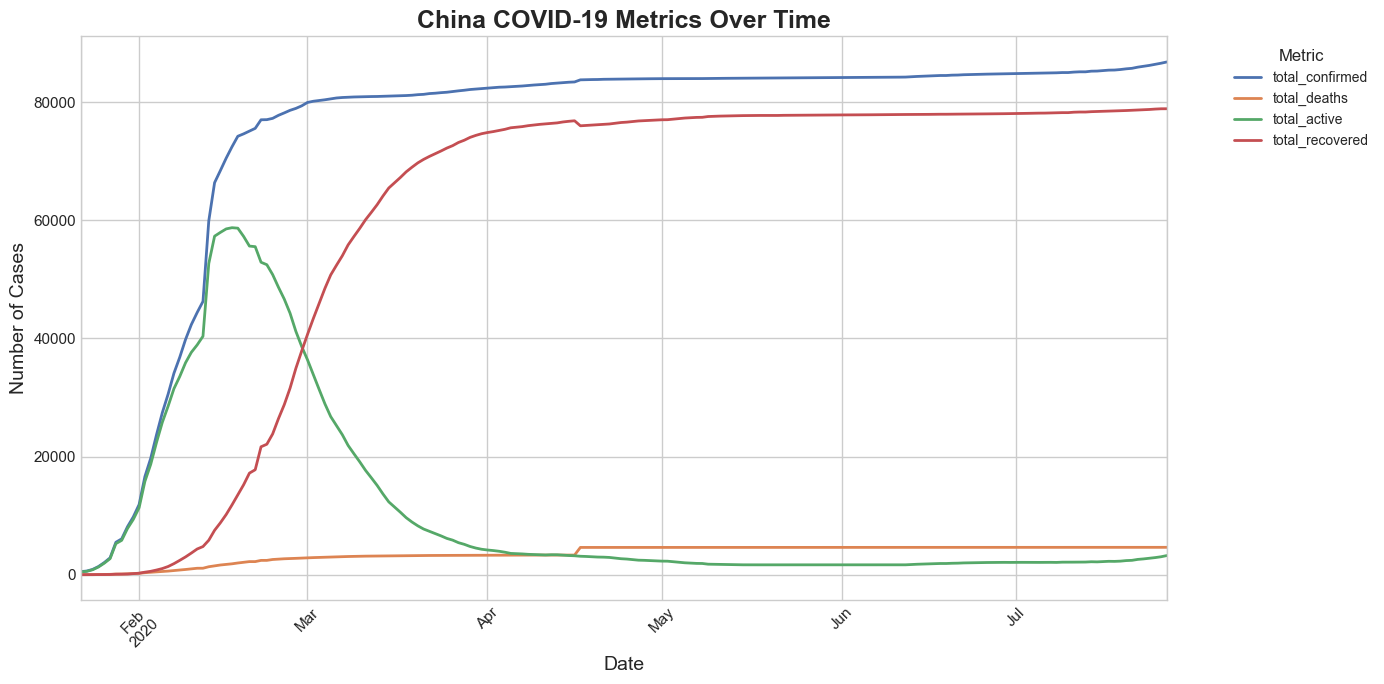

In [ ]:
import ipywidgets as widgets
from IPython.display import display, clear_output
conn = sqlite3.connect("covid.db")

def plot_US():
    US_query = """
        select
        Date,
        sum(Confirmed) as total_confirmed,
        sum(Active) as total_active,
        sum(Deaths) as total_deaths,
        sum(Recovered) as total_recovered
        from covid
        where Country = 'US'
        group by Date
        order by Date;
    """
    US_df = pd.read_sql_query(US_query, conn, parse_dates=["Date"]).sort_values("Date")
    US_df = US_df.set_index("Date")
    plt.figure(figsize=(14, 7))
    US_df[["total_confirmed", "total_deaths", "total_active", "total_recovered"]].plot(ax=plt.gca(), linewidth=2)
    plt.title("US COVID-19 Metrics Over Time", fontsize=18, weight='bold')
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Number of Cases", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_jp():
    jp_query = """
        select
        Date,
        sum(Confirmed) as total_confirmed,
        sum(Active) as total_active,
        sum(Deaths) as total_deaths,
        sum(Recovered) as total_recovered
        from covid
        where Country = 'Japan'
        group by Date
        order by Date;
    """
    jp_df = pd.read_sql_query(jp_query, conn, parse_dates=["Date"]).sort_values("Date")
    jp_df = jp_df.set_index("Date")
    plt.figure(figsize=(14, 7))
    jp_df[["total_confirmed", "total_deaths", "total_active", "total_recovered"]].plot(ax=plt.gca(), linewidth=2)
    plt.title("Japan COVID-19 Metrics Over Time", fontsize=18, weight='bold')
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Number of Cases", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), fontsize=10)
    plt.tight_layout()
    plt.show()

def plot_cn():
    cn_query = """
        select
        Date,
        sum(Confirmed) as total_confirmed,
        sum(Active) as total_active,
        sum(Deaths) as total_deaths,
        sum(Recovered) as total_recovered
        from covid
        where Country = 'China'
        group by Date
        order by Date;
    """
    cn_df = pd.read_sql_query(cn_query, conn, parse_dates=["Date"]).sort_values("Date")
    cn_df = cn_df.set_index("Date")
    plt.figure(figsize=(14, 7))
    cn_df[["total_confirmed", "total_deaths", "total_active", "total_recovered"]].plot(ax=plt.gca(), linewidth=2)
    plt.title("China COVID-19 Metrics Over Time", fontsize=18, weight='bold')
    plt.xlabel("Date", fontsize=14)
    plt.ylabel("Number of Cases", fontsize=14)
    plt.xticks(rotation=45)
    plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), fontsize=10)
    plt.tight_layout()
    plt.show()

PLOTS = {
    "US": plot_US,
    "Japan": plot_jp,
    "China": plot_cn,
}

# dropdown
country_dd = widgets.Dropdown(
    options=list(PLOTS.keys()),
    value="US",
    description="Country:"
)

out = widgets.Output()

def on_change(change):
    if change["name"] == "value":
        with out:
            clear_output(wait=True)
            PLOTS[change["new"]]()

country_dd.observe(on_change, names="value")

display(country_dd, out)

with out:
    PLOTS[country_dd.value]()

#### Since GitHub won't render the full dropdown, here are the three graphs:

In [ ]:
conn = sqlite3.connect("covid.db")
US_query = """
select
  Date,
  sum(Confirmed) as total_confirmed,
  sum(Active) as total_active,
  sum(Deaths) as total_deaths,
  sum(Recovered) as total_recovered
from covid
where Country = 'US'
group by Date
order by Date;
"""
US_df = pd.read_sql_query(US_query, conn, parse_dates=["Date"]).sort_values("Date")
US_df = US_df.set_index("Date")
plt.figure(figsize=(14, 7))
US_df[["total_confirmed", "total_deaths", "total_active", "total_recovered"]].plot(ax=plt.gca(), linewidth=2)
plt.title("US COVID-19 Metrics Over Time", fontsize=18, weight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()
plt.show()

In [ ]:
jp_query = """
select
  Date,
  sum(Confirmed) as total_confirmed,
  sum(Active) as total_active,
  sum(Deaths) as total_deaths,
  sum(Recovered) as total_recovered
from covid
where Country = 'Japan'
group by Date
order by Date;
"""
jp_df = pd.read_sql_query(jp_query, conn, parse_dates=["Date"]).sort_values("Date")
jp_df = jp_df.set_index("Date")
plt.figure(figsize=(14, 7))
jp_df[["total_confirmed", "total_deaths", "total_active", "total_recovered"]].plot(ax=plt.gca(), linewidth=2)
plt.title("Japan COVID-19 Metrics Over Time", fontsize=18, weight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()

In [ ]:
cn_query = """
select
  Date,
  sum(Confirmed) as total_confirmed,
  sum(Active) as total_active,
  sum(Deaths) as total_deaths,
  sum(Recovered) as total_recovered
from covid
where Country = 'China'
group by Date
order by Date;
"""
cn_df = pd.read_sql_query(cn_query, conn, parse_dates=["Date"]).sort_values("Date")
conn.close()
cn_df = cn_df.set_index("Date")
plt.figure(figsize=(14, 7))
cn_df[["total_confirmed", "total_deaths", "total_active", "total_recovered"]].plot(ax=plt.gca(), linewidth=2)
plt.title("China COVID-19 Metrics Over Time", fontsize=18, weight='bold')
plt.xlabel("Date", fontsize=14)
plt.ylabel("Number of Cases", fontsize=14)
plt.xticks(rotation=45)
plt.legend(title="Metric", bbox_to_anchor=(1.05, 1), fontsize=10)
plt.tight_layout()

### Summary

In [71]:
import panel as pn
pn.extension('plotly')

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from datetime import datetime

DB_PATH = "covid.db"

def ts(x):
    return pd.to_datetime(x).strftime("%Y-%m-%d %H:%M:%S")

def date_bounds():
    with sqlite3.connect(DB_PATH) as conn:
        b = pd.read_sql_query(
            "select min(Date) as min_d, max(Date) as max_d from covid;",
            conn,
            parse_dates=["min_d","max_d"]
        )
    return b.loc[0,"min_d"], b.loc[0,"max_d"]

def load_global(start, end):
    q = """
    select Date,
           sum(Confirmed) as total_confirmed,
           sum(Active)    as total_active,
           sum(Deaths)    as total_deaths,
           sum(Recovered) as total_recovered
    from covid
    where Date between ? AND ?
    group by Date
    order by Date;
    """
    with sqlite3.connect(DB_PATH) as conn:
        df = pd.read_sql_query(q, conn,
                               params=[ts(start), ts(end)],
                               parse_dates=["Date"])
    return df

def load_top5(start, end):
    q = """
    with totals as (
      select Country, sum(Confirmed) as total_c
      from covid
      where Date BETWEEN ? AND ?
      group by Country
      order by total_c desc
      limit 5
    )
    select c.Country, c.Date, c.Confirmed
    from covid c
    join totals t ON t.Country = c.Country
    where c.Date between ? AND ?
    order by c.Date, c.Country;
    """
    with sqlite3.connect(DB_PATH) as conn:
        df = pd.read_sql_query(q, conn,
                               params=[ts(start), ts(end), ts(start), ts(end)],
                               parse_dates=["Date"])
    return df

def load_monthly_by_region(start, end, has_region=True):
    if has_region:
        q = """
        select WHO_Region,
               strftime('%Y-%m', Date) as year_month,
               sum(Confirmed) as monthly_confirmed
        from covid
        where Date BETWEEN ? and ?
        group by WHO_Region, year_month
        order by year_month, WHO_Region;
        """
    else:
        q = """
        select cc.WHO_Region,
               strftime('%Y-%m', c.Date) as year_month,
               sum(c.Confirmed) as monthly_confirmed
        from covid c
        join country_region cc on cc.Country = c.Country
        where c.Date between ? and ?
        group by cc.WHO_Region, year_month
        order by year_month, cc.WHO_Region;
        """
    with sqlite3.connect(DB_PATH) as conn:
        df = pd.read_sql_query(q, conn, params=[ts(start), ts(end)])
    return df

def load_regions_snapshot(snap_date, has_region=True):
    if has_region:
        q = """
        select WHO_Region,
               sum(Confirmed) as total_confirmed,
               sum(Deaths) as total_deaths
        from covid
        where Date = ?
        group by WHO_Region
        order by total_confirmed DESC;
        """
    else:
        q = """
        select cc.WHO_Region,
               sum(c.Confirmed) as total_confirmed,
               sum(c.Deaths) as total_deaths
        from covid c
        join country_region cc on cc.Country = c.Country
        where c.Date = ?
        group by cc.WHO_Region
        order by total_confirmed desc;
        """
    with sqlite3.connect(DB_PATH) as conn:
        return pd.read_sql_query(q, conn, params=[ts(snap_date)])

def metrics_figure(gdf):
    fig = make_subplots(rows=2, cols=2, shared_xaxes=True,
                        subplot_titles=("Confirmed", "Active", "Deaths", "Recovered"))
    series = [("total_confirmed",1,1), ("total_active",1,2),
              ("total_deaths",2,1), ("total_recovered",2,2)]
    for col, r, c in series:
        if col in gdf.columns:
            fig.add_trace(go.Scatter(x=gdf["Date"], y=gdf[col], mode="lines", name=col), row=r, col=c)
    fig.update_layout(height=550, showlegend=False, margin=dict(l=30,r=20,t=50,b=20),
                      title="Global Metrics Over Time")
    return fig

def top5_figure(df):
    if df.empty: 
        return go.Figure()
    fig = px.line(df, x="Date", y="Confirmed", color="Country",
                  title="Top 5 Countries — Confirmed Over Time")
    fig.update_layout(height=420, margin=dict(l=10,r=10,t=50,b=10))
    return fig

def monthly_region_area(df):
    if df.empty: 
        return go.Figure()
    df = df.copy()
    df["year_month"] = pd.to_datetime(df["year_month"] + "-01")
    df = df.sort_values("year_month")
    fig = px.area(df, x="year_month", y="monthly_confirmed", color="WHO_Region",
                  title="Monthly Confirmed by Region")
    fig.update_layout(height=420, margin=dict(l=10,r=10,t=50,b=10))
    return fig

def snapshot_scatter(df, label_date):
    if df.empty: 
        return go.Figure()
    fig = px.scatter(df, x="total_confirmed", y="total_deaths", text="WHO_Region", trendline="ols",
                     title=f"Confirmed vs Deaths by Region — {label_date:%Y-%m-%d}")
    fig.update_traces(textposition="top center")
    fig.update_layout(height=420, margin=dict(l=10,r=10,t=50,b=10),
                      xaxis_title="Total Confirmed", yaxis_title="Total Deaths")
    return fig

def corr_heatmap(start, end):
    gdf = load_global(start, end)
    if gdf.empty: 
        return go.Figure()
    c = gdf.corr(numeric_only=True).round(2)
    fig = px.imshow(c, text_auto=True, aspect="auto", color_continuous_scale="RdBu",
                    origin="lower", title="Metric Correlations")
    fig.update_layout(height=420, margin=dict(l=10,r=10,t=50,b=10))
    return fig

# widgets
min_d, max_d = date_bounds()
start_picker = pn.widgets.DatePicker(name="Start", value=min_d.date(), start=min_d.date(), end=max_d.date())
end_picker   = pn.widgets.DatePicker(name="End",   value=max_d.date(), start=min_d.date(), end=max_d.date())
has_region   = pn.widgets.Checkbox(name="Table has WHO_Region column", value=True)
snap_picker  = pn.widgets.DatePicker(name="Snapshot date", value=max_d.date(), start=min_d.date(), end=max_d.date())

@pn.depends(start_picker.param.value, end_picker.param.value)
def view_metrics(start, end):
    g = load_global(pd.to_datetime(start), pd.to_datetime(end))
    return pn.pane.Plotly(metrics_figure(g), config={'responsive': True})

@pn.depends(start_picker.param.value, end_picker.param.value)
def view_top5(start, end):
    t5 = load_top5(pd.to_datetime(start), pd.to_datetime(end))
    return pn.pane.Plotly(top5_figure(t5), config={'responsive': True})

@pn.depends(start_picker.param.value, end_picker.param.value, has_region.param.value)
def view_monthly(start, end, has_reg):
    m = load_monthly_by_region(pd.to_datetime(start), pd.to_datetime(end), has_reg)
    return pn.pane.Plotly(monthly_region_area(m), config={'responsive': True})

@pn.depends(snap_picker.param.value, has_region.param.value)
def view_scatter(snap, has_reg):
    snap_dt = pd.to_datetime(snap)
    r = load_regions_snapshot(snap_dt, has_reg)
    return pn.pane.Plotly(snapshot_scatter(r, snap_dt), config={'responsive': True})

@pn.depends(start_picker.param.value, end_picker.param.value)
def view_corr(start, end):
    return pn.pane.Plotly(corr_heatmap(pd.to_datetime(start), pd.to_datetime(end)), config={'responsive': True})

# layout
controls = pn.Row(start_picker, end_picker, has_region, snap_picker)
dashboard = pn.Column(
    "# COVID-19 Dashboard (Panel in Jupyter)",
    controls,
    view_metrics,
    view_top5,
    view_monthly,
    view_scatter,
    view_corr,
)
dashboard.servable(); dashboard

BokehModel(combine_events=True, render_bundle={'docs_json': {'c3abc83e-c78e-492c-a493-40ffd6f21ef1': {'version…